## Deep Neural Network for MNIST Dataset

**Importing Libraries**

In [1]:
# Following block of code is used to hide/show the warnings in the notebook

from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow.keras as keras
import os
import time
from sklearn.metrics import classification_report, confusion_matrix
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

2021-11-28 20:48:31.912336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-28 20:48:31.912370: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Loading MNIST dataset from keras

In [3]:
mnist = keras.datasets.mnist.load_data()

### EDA

In [4]:
(train_x_all, train_y), (test_x_all, test_y) = mnist
print(f'Shape of training data = {train_x_all.shape}')
print(f'Shape of testing data = {test_x_all.shape}')

Shape of training data = (60000, 28, 28)
Shape of testing data = (10000, 28, 28)


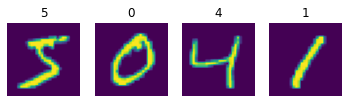

In [5]:
fig, ax =  plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(train_x_all[i])
    ax[i].set_title(train_y[i])
    ax[i].axis('off')
    

In [6]:
train_x = train_x_all/255.0
test_x =  test_x_all/255.0

### Building and Compiling Model

In [7]:
def build_model(n_layers=1, neuron_list = None, learning_rate=0.01, momentum=0.0):
    model = keras.Sequential(name='mnist')
    model.add(keras.layers.Flatten(input_shape=[28, 28], name='Input'))
    if neuron_list is None:
        neuron_list = [32]*n_layers
    for n in neuron_list:
        model.add(keras.layers.Dense(n, activation='relu'))
    model.add(keras.layers.Dense(10, activation = keras.activations.softmax, name="Output"))
    optimzer= keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = 'sgd', metrics=['accuracy'])
    return model

In [8]:
model = build_model(neuron_list=[32, 32])
model.summary()

Model: "mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


2021-11-28 20:48:34.762423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-28 20:48:34.762462: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-28 20:48:34.762500: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ajay-pc): /proc/driver/nvidia/version does not exist
2021-11-28 20:48:34.762694: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Defining Callbacks 

In [9]:
def get_log_dir():
    root_dir = os.path.join(os.curdir, "my_logs")
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_dir, run_id)   

In [10]:
earlystopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tensorboard_callback = keras.callbacks.TensorBoard(get_log_dir())
call_backs = [earlystopping_callback, tensorboard_callback]

2021-11-28 20:48:34.820533: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-11-28 20:48:34.820588: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-11-28 20:48:34.822835: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


### Model Fitting

In [11]:
history = model.fit(train_x, train_y, epochs=1000, validation_split=0.2,
                    shuffle=True, verbose=1, callbacks=[call_backs])

2021-11-28 20:48:34.932104: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 150528000 exceeds 10% of free system memory.
2021-11-28 20:48:35.055986: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-28 20:48:35.076895: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz


Epoch 1/1000
 166/1500 [==>...........................] - ETA: 1s - loss: 2.0763 - accuracy: 0.3326

2021-11-28 20:48:35.381178: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-11-28 20:48:35.381208: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-11-28 20:48:35.384212: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 20:48:35.386364: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-11-28 20:48:35.391850: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_logs/run_2021_11_28-20_48_34/train/plugins/profile/2021_11_28_20_48_35
2021-11-28 20:48:35.392846: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2021_11_28-20_48_34/train/plugins/profile/2021_11_28_20_48_35/ajay-pc.trace.json.gz
2021-11-28 20:48:35.398306: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_logs/run_2021_11_28-

1500/1500 [==============================] - 2s 1ms/step - loss: 0.8130 - accuracy: 0.7742 - val_loss: 0.3814 - val_accuracy: 0.8907
Epoch 2/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3621 - accuracy: 0.8942 - val_loss: 0.3094 - val_accuracy: 0.9121
Epoch 3/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3076 - accuracy: 0.9108 - val_loss: 0.2741 - val_accuracy: 0.9219
Epoch 4/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9208 - val_loss: 0.2512 - val_accuracy: 0.9265
Epoch 5/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2488 - accuracy: 0.9275 - val_loss: 0.2272 - val_accuracy: 0.9332
Epoch 6/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2288 - accuracy: 0.9342 - val_loss: 0.2135 - val_accuracy: 0.9377
Epoch 7/1000
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2124 - accuracy: 0.9387 - val_loss: 0.2018 - val_accuracy

### Errors

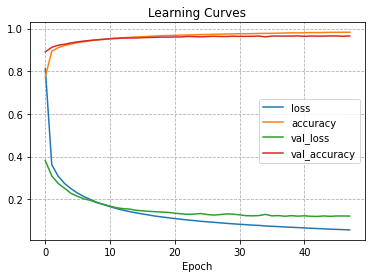

In [12]:
logs = pd.DataFrame(history.history)
ax = logs.plot(title = 'Learning Curves', xlabel = 'Epoch')
ax.grid(linestyle = '--')

### Confusion Matrix and classifiaction scores

In [13]:
def plot_images_and_labels(test_x, test_y, y_pred):
    fig, axes = plt.subplots(4, 4, figsize= (8, 8))
    for i, ax in enumerate(axes.flatten()):
        data_ =  test_x[i]
        color= 'g'
        ax.imshow(data_)
        if y_pred[i] != test_y[i]:
            color ='r'
        ax.set_title(f"Pred:{y_pred[i]}| Act:{test_y[i]}", color=color)
        ax.axis('off')
    plt.show()


def generate_error_reports(model, test_x, test_y):
    y_pred = model.predict_classes(test_x)
    print("Confusion Maxtrix:")
    print(classification_report(test_y, y_pred))
    _, ax = plt.subplots(figsize= (12, 5))
    sn.heatmap(confusion_matrix(test_y, y_pred), cmap='Blues', annot=True, ax=ax)
    ax.set_title("Confusion Matrix")
    plot_images_and_labels(test_x, test_y, y_pred)

Confusion Maxtrix:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.95      0.97      0.96       982
           5       0.97      0.95      0.96       892
           6       0.96      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



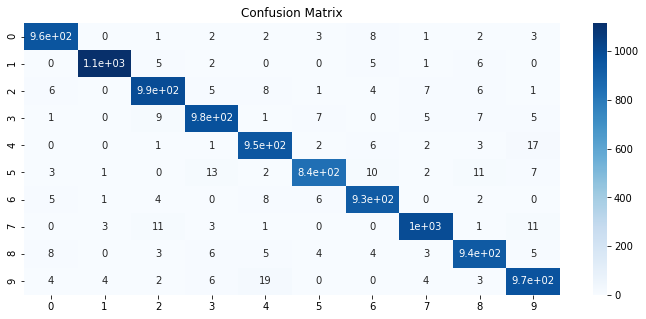

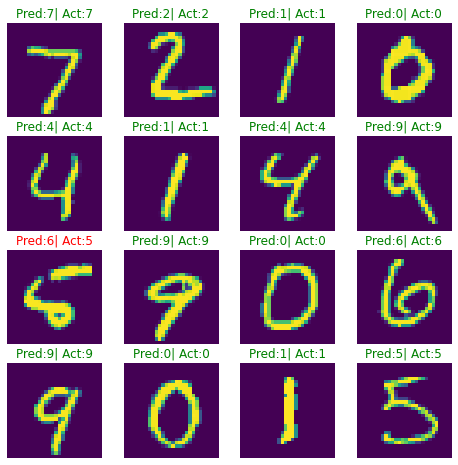

In [14]:
generate_error_reports(model,test_x, test_y)

### Using Scikit Learn to find optimum number of layer in model

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)
param_grid = {'n_layers':[1, 2, 3, 4],
              'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
              'momentum':[0.0, 0.01, 0.05, 0.1]}
grid_clf = RandomizedSearchCV(estimator=clf, scoring='accuracy', param_distributions=param_grid)
grid_clf.fit(train_x, train_y, epochs=1000, validation_split=0.2,
             callbacks=[earlystopping_callback], shuffle=True, verbose=0)


2021-11-28 20:54:39.913274: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 120422400 exceeds 10% of free system memory.
2021-11-28 20:56:27.103878: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 120422400 exceeds 10% of free system memory.
2021-11-28 20:57:54.727231: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 120422400 exceeds 10% of free system memory.
2021-11-28 20:59:31.964179: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 120422400 exceeds 10% of free system memory.


RandomizedSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f74941b3100>,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0.5],
                                        'momentum': [0.0, 0.01, 0.05, 0.1],
                                        'n_layers': [1, 2, 3, 4]},
                   scoring='accuracy')

In [18]:
best_model = grid_clf.best_estimator_.model
print("Best Score", grid_clf.best_score_)

Best Score 0.9605


Confusion Maxtrix:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.97      0.95      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.95      0.97      0.96      1028
           8       0.97      0.94      0.95       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



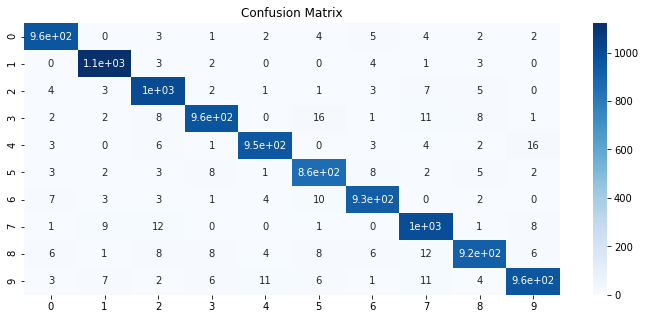

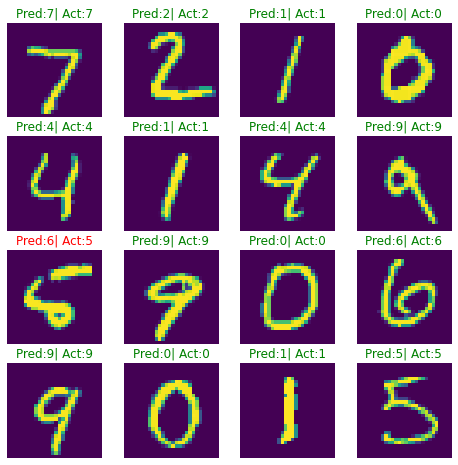

In [19]:
generate_error_reports(best_model, test_x, test_y)

### Visualizing Model metrics in TensorBoard

In [20]:
%load_ext tensorboard
%tensorboard --logdir=my_logs --port=6006